# Avocado Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Relevant columns in the Dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

#### Our goal is to predict the Average Price of the different type of Avocado.


In [3]:
#checking dataset dimensions
df.shape

(18249, 14)

In our dataset, we have 18249 rows and 14 columns including target variable "AveragePrice".

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

These are all our columns. From we can drop the column "Unnamed: 0" as its just a kind of id which has no effect on dataset.

In [5]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In the dataset, we have only 3 columns with object datatype out of which one is Date and other two are string values.
Rest other columns have numeric values. We will do some do some Feature Engineering on the Date Feature in pre-processing later so we can be able to use the day and the month columns in building our machine learning model later. We already have year feature.

In [6]:
#checking the unique values count for each column
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [7]:
#checking unique values for "type" column
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Dataset has two types of Avocado : Conventional and Organic. We have their balanced data.

In [8]:
#checking unique values for "year" column
df["year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

We have data from the year 2015 to 2018. We dont have much data for year 2018 as compared to the other 3 years.

In [9]:
df["region"].value_counts()

Philadelphia           338
Pittsburgh             338
SouthCentral           338
NewYork                338
Syracuse               338
Plains                 338
PhoenixTucson          338
California             338
Denver                 338
DallasFtWorth          338
Charlotte              338
Seattle                338
MiamiFtLauderdale      338
Tampa                  338
Albany                 338
Atlanta                338
Boston                 338
Nashville              338
Detroit                338
Northeast              338
Sacramento             338
Chicago                338
TotalUS                338
Houston                338
BuffaloRochester       338
HartfordSpringfield    338
StLouis                338
Boise                  338
Portland               338
Jacksonville           338
Midsouth               338
LasVegas               338
Southeast              338
GreatLakes             338
SouthCarolina          338
SanFrancisco           338
LosAngeles             338
B

In [10]:
#checking missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in our dataset.

<AxesSubplot:>

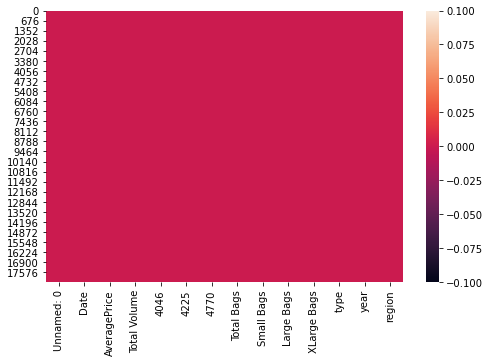

In [11]:
#plotting heatmap to view the missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

In [12]:
#checking the AveragePrice year wise
df.groupby("year")["AveragePrice"].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Here we observe that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.

In [13]:
#checking the AveragePrice year wise
df.groupby("year")["Total Volume"].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [14]:
#checking the count of type of Avocados sold year wise
df.groupby("year")["type"].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

Here we observe that both type of avocado is present almost in same amount in the data set.

In [15]:
#checking AveragePrice of each type of Avocado 
df.groupby("type")["AveragePrice"].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

This shows that Average Price of Organic Avocados is higher than that of Conventional Avocados.

In [16]:
#statistical information
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Statistical observations:
- Since number of rows in each column are same, means there are no null values in the data set.
- Mean and Median of most of the columns are very close to each other, that means the distribution is normal. We see a difference in Mean and Median for the columns "4046" and "XLarge Bags", which means the distribution is not normal for these columns.
- By checking the difference between the 75% and max value there are outliers in some of the columns. We will check it further.

## Preprocessing

- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [17]:
df.drop("Unnamed: 0",axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature Unnamed:0 is removed

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [19]:
df["Date"]=pd.to_datetime(df["Date"])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

- Lets check the head.

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## Exploratory Data Analysis:

### A] Univariate Analysis

#### Plotting Boxplots for the columns having continuous values

<AxesSubplot:xlabel='AveragePrice'>

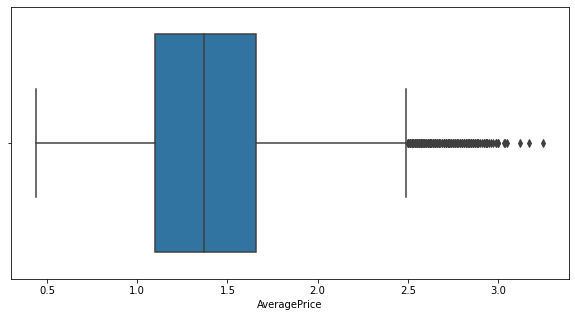

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(df["AveragePrice"])

<AxesSubplot:xlabel='Total Volume'>

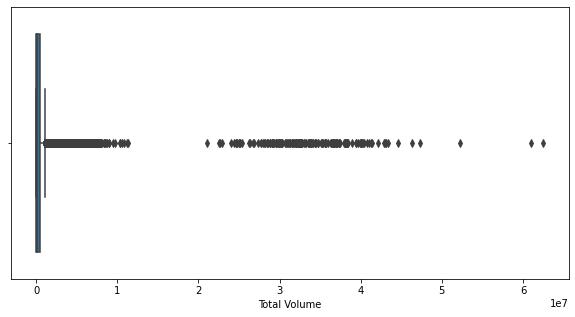

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Total Volume"])

<AxesSubplot:xlabel='4046'>

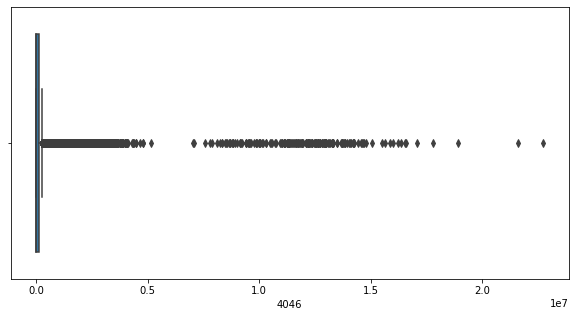

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(df["4046"])

<AxesSubplot:xlabel='4225'>

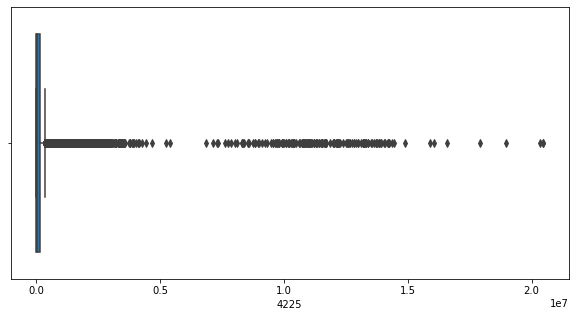

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(df["4225"])

<AxesSubplot:xlabel='4770'>

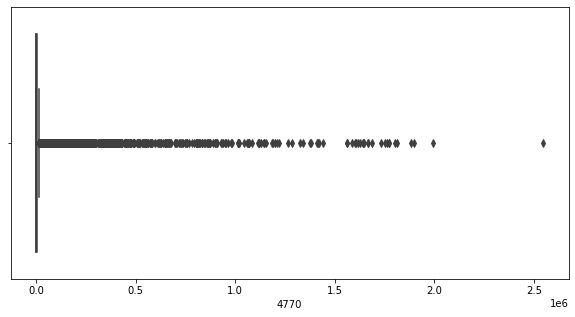

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(df["4770"])

<AxesSubplot:xlabel='Total Bags'>

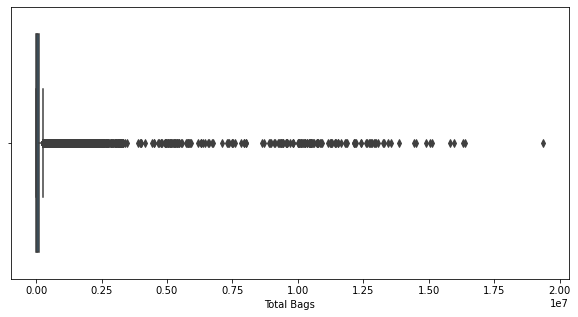

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Total Bags"])

<AxesSubplot:xlabel='Small Bags'>

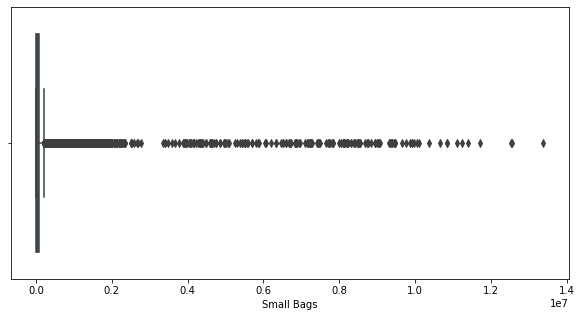

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Small Bags"])

<AxesSubplot:xlabel='Large Bags'>

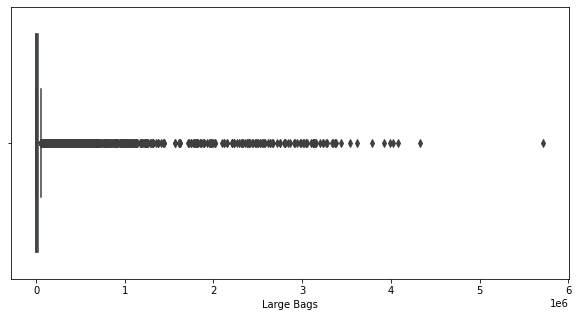

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Large Bags"])

<AxesSubplot:xlabel='XLarge Bags'>

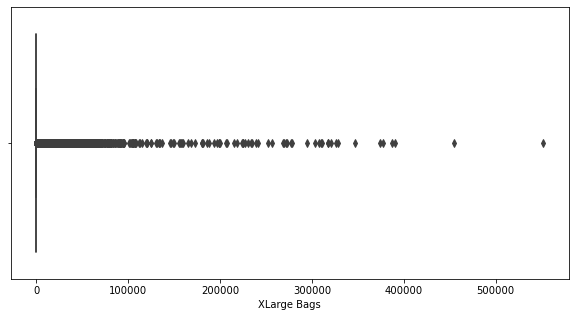

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(df["XLarge Bags"])

From the plots we can clearly see that there are number of black dots in most of the columns which are referring to the outliers, so it means most of the data are outside the distribution. We will remove the outliers in the coming steps.

#### Plotting Distribution plots for the columns having continuous values

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

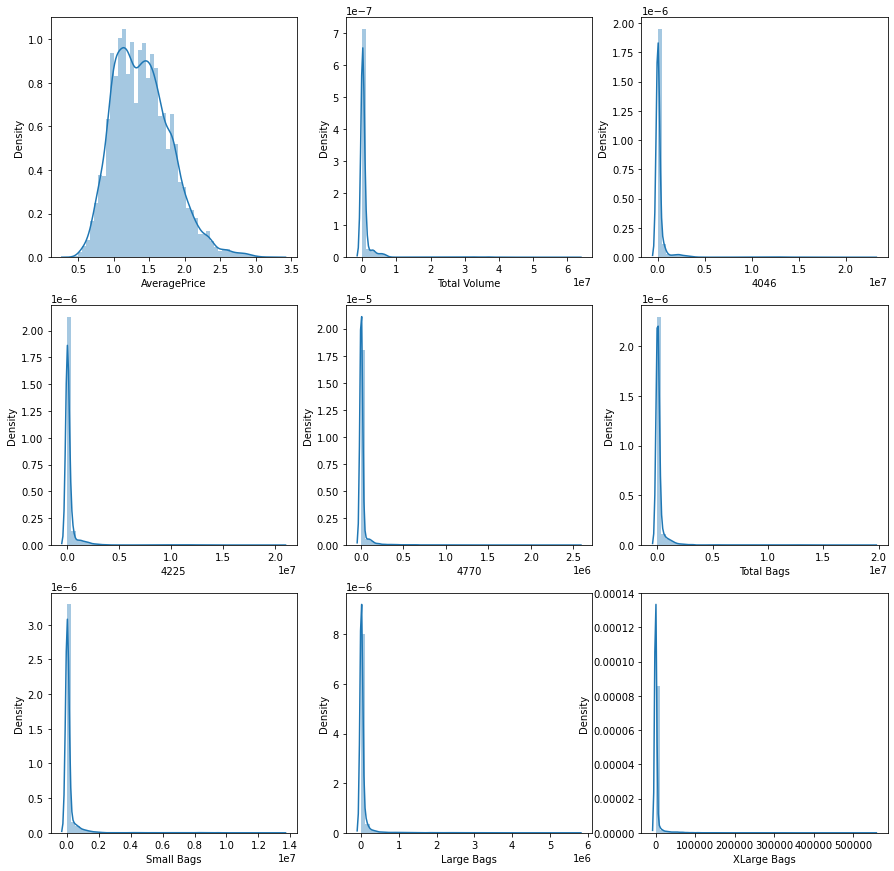

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(df["AveragePrice"])
plt.subplot(3,3,2)
sns.distplot(df["Total Volume"])
plt.subplot(3,3,3)
sns.distplot(df["4046"])
plt.subplot(3,3,4)
sns.distplot(df["4225"])
plt.subplot(3,3,5)
sns.distplot(df["4770"])
plt.subplot(3,3,6)
sns.distplot(df["Total Bags"])
plt.subplot(3,3,7)
sns.distplot(df["Small Bags"])
plt.subplot(3,3,8)
sns.distplot(df["Large Bags"])
plt.subplot(3,3,9)
sns.distplot(df["XLarge Bags"])

From the above distribution plots we can say that,
- Average price column is normally distributed.
- Rest of the data are not much varying in term of numbers, so they are almost right skewed data. To make the columns normally distributed, we will attempt to remove the skewness. 


<AxesSubplot:xlabel='type', ylabel='count'>

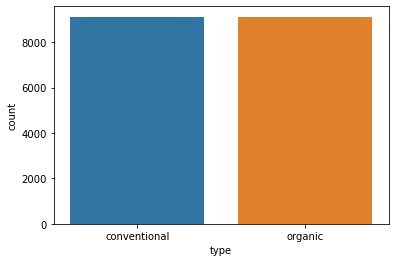

In [31]:
sns.countplot(df["type"])

Above countplot shows that in our dataset both types of Avacados are equally present.

<AxesSubplot:xlabel='year', ylabel='count'>

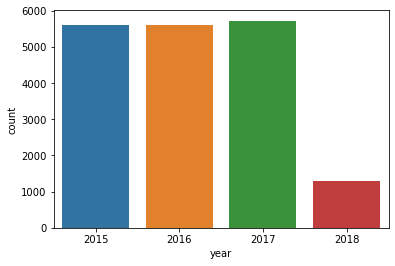

In [32]:
sns.countplot(df["year"])

Above countplot shows that our dataset has almost equal amount of data of the years 2015,2016 and 2017. We have almost 1300 entries for the year 2018.

### B] Bivariate Analysis

([<matplotlib.patches.Wedge at 0x23a46850fd0>,
 [Text(-1.0957170610706406, 0.09697485281617313, 'Conventional'),
  Text(1.0957170565309189, -0.09697490411039067, 'Organic')])

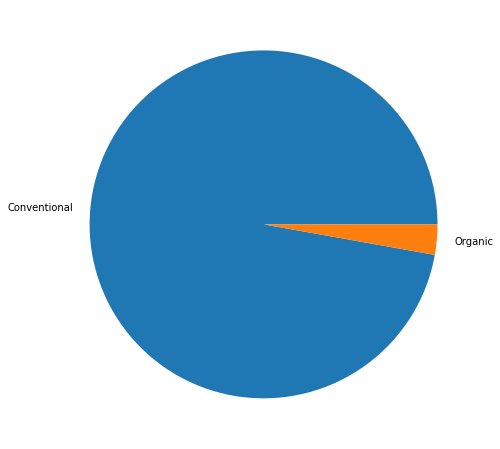

In [33]:
plt.figure(figsize=(10,8))
Type=df.groupby('type')['Total Volume'].agg(sum)

values=[Type['conventional'],Type['organic']]
labels=["Conventional","Organic"]
plt.pie(x=values,labels=labels)

Just over 2% of our dataset is organic. So looks like Conventional is in more demand. 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

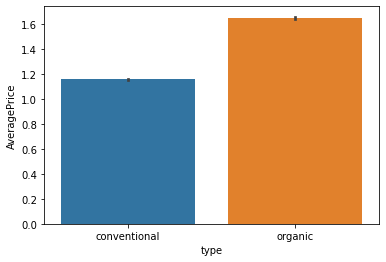

In [34]:
sns.barplot(x=df["type"],y=df["AveragePrice"])

Average Price of Organic Avacados is higher than that of conventional.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

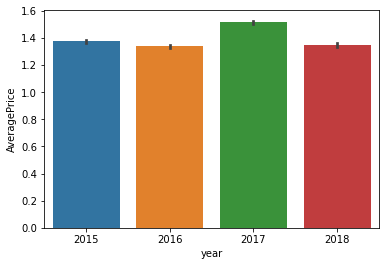

In [35]:
sns.barplot(x="year",y="AveragePrice",data=df)

Average price was highest in 2017 at 1.51 and dropped in 2018 to 1.34

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

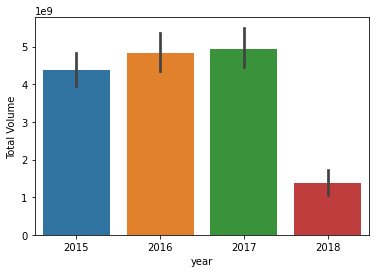

In [36]:
sns.barplot(x="year",y="Total Volume",data=df,estimator=sum)

Total Sales Volume was spotted highest in 2017 by 4,934 Million and then declined in 2018 by 1,382 Million.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

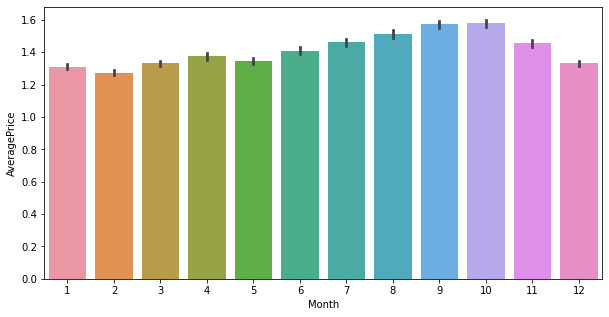

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="Month",y="AveragePrice",data=df)

AveragePrice remains high during August, September, October and starts sropping November onwards.

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

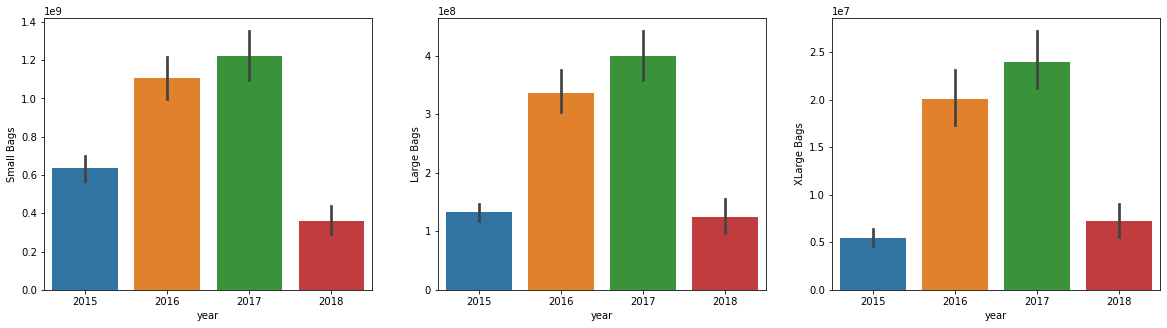

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1),
sns.barplot(x="year",y="Small Bags",data=df,estimator=sum)
plt.subplot(1,3,2)
sns.barplot(x="year",y="Large Bags",data=df,estimator=sum)
plt.subplot(1,3,3)
sns.barplot(x="year",y="XLarge Bags",data=df,estimator=sum)

From the above barplots we can say that,
- Maximum number of Bags were sold in the years 2016 and 2017.
- Least bags of Avacados were sold in the year 2018.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

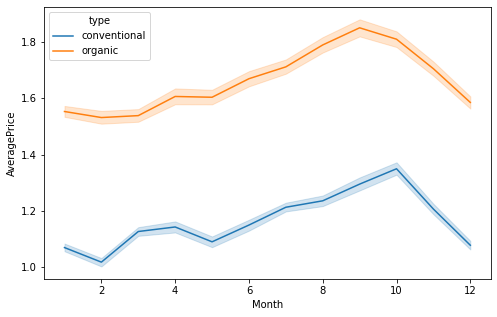

In [39]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Month",y="AveragePrice",hue="type",data=df)

From the above lineplot:
- There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
- Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

Text(0.5, 1.0, 'Average Price of Avacado according to Region')

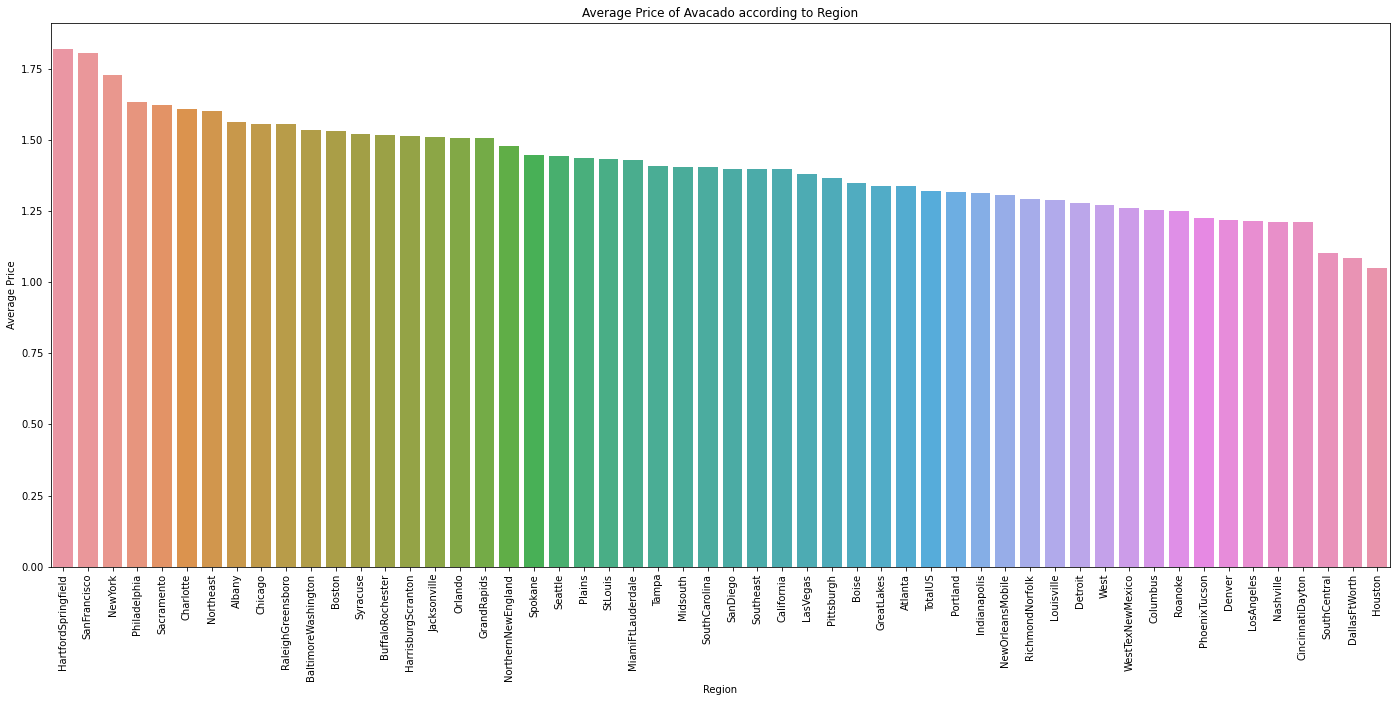

In [40]:
region_list=list(df.region.unique())
avg_price=[]

for i in region_list:
    x=df[df.region==i]
    region_avg=sum(x.AveragePrice)/len(x)
    avg_price.append(region_avg)

df1=pd.DataFrame({'region_list':region_list,'average_price':avg_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.title("Average Price of Avacado according to Region")

In the following regions the price of Avacado is high:
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento

Text(0.5, 1.0, 'Average of Total Volume according to Region')

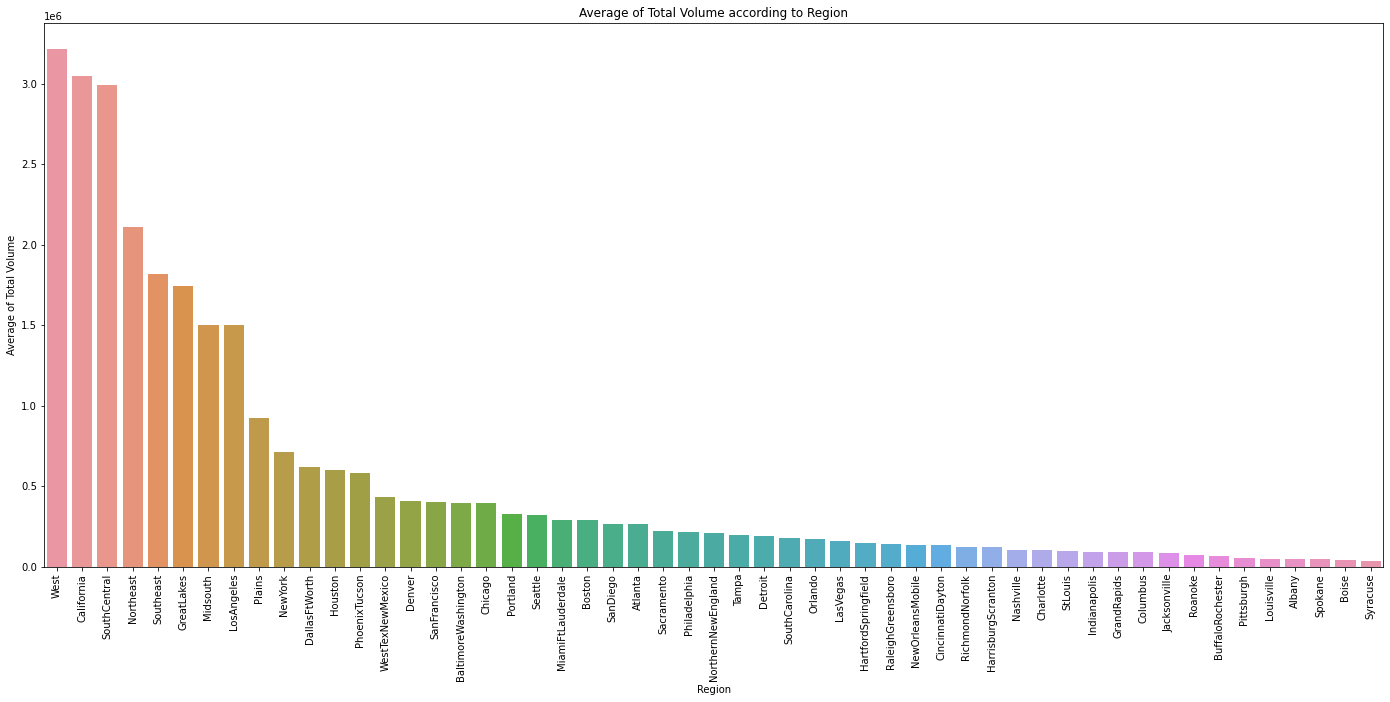

In [41]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
avg_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    avg_total_volume.append(sum(x['Total Volume'])/len(x))
    
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':avg_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average of Total Volume")
plt.title("Average of Total Volume according to Region")

In the following regions the comsumption of Avacado is very high:
- West
- California
- SouthCentral
- Northeast
- Southeast

Text(0.5, 1.0, 'Average Price')

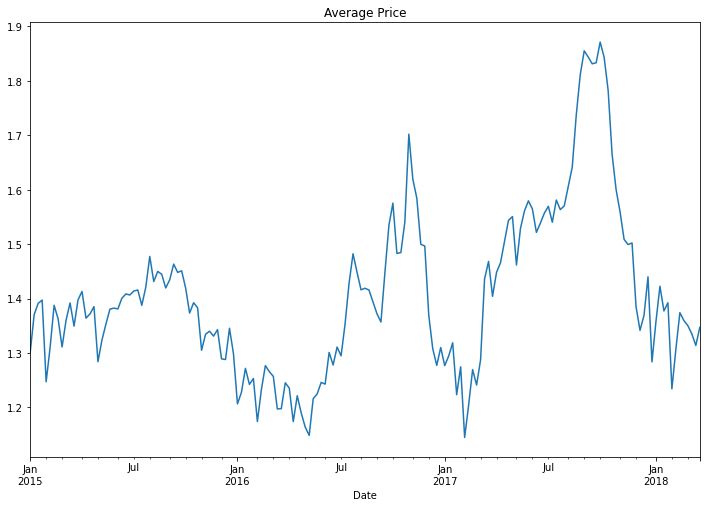

In [42]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after July 2017 and before Jan 2018.

### Feature Engineering for Model building

In [43]:
df['region'].nunique()

54

In [44]:
df['type'].nunique()

2

- As we can see we have 54 regions and 2 unique types, so it will be easy to transform the type feature to dummies, but for the region its going to be a bit complex, so let's drop the entire region column.

- Let's drop the Date feature too because we already have 3 other columns for the Year, Month and Day.

In [45]:
df=pd.get_dummies(df.drop(["region","Date"],axis=1),drop_first=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


### C] Multivariate Analysis

<AxesSubplot:>

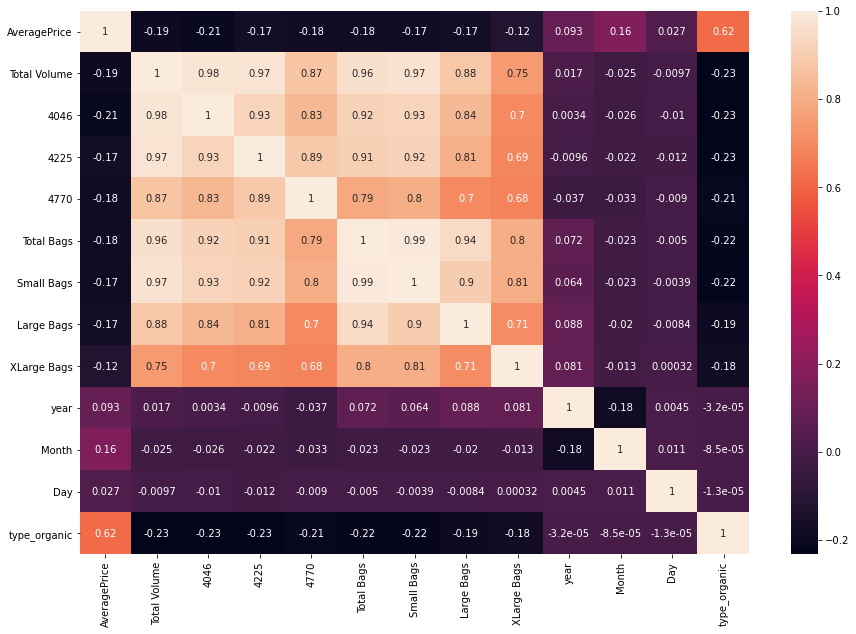

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

#### Observations:
- Target Variable "AveragePrice" is highly correlated with "type_organic" feature and least correlated with "Day" and "year".
- Independent variable "Total Volume" is highly correlated with other indepedent variables like "4046","4225","Total Bags","Small Bags".
- "Total Bags" is highly correlated with "Small Bags" and "Large Bags". This may cause multicollinearity problem.

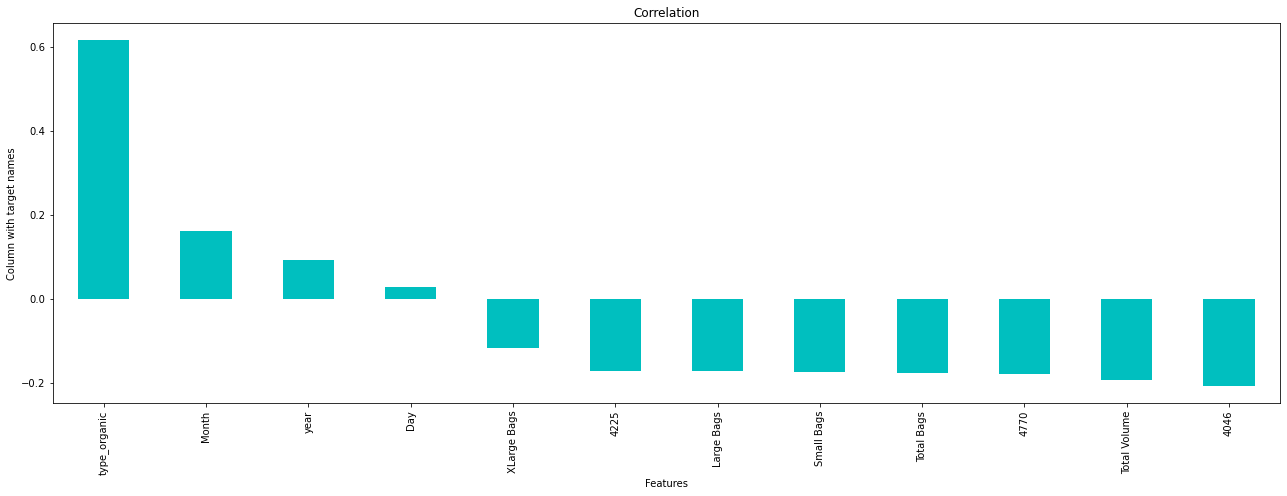

In [48]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

This also shows that Day and year are least correlated with AveragePrice.

### Removing Outliers:

In [49]:
threshold=3
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [50]:
df_new.shape

(17651, 13)

After removing we have 17651 rows and 13 columns.

### Percentage of data loss:

In [51]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

3.28 %


There is 3.28% of data loss with the outlier removal. To some extent outliers are removed.

### Creating X an Y Split

In [52]:
x=df_new.drop("AveragePrice",axis=1)
y=df_new["AveragePrice"]

### Checking and Removing Skewness

In [53]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
type_organic     0.000329
dtype: float64

This is the skewness before removing outliers.

In [54]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

After removing outliers, Skewness is also reduced but not completely. Here we have skewness for the below columns:

In [55]:
from sklearn.preprocessing import PowerTransformer

In [56]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [57]:
x.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
Day            -0.208926
type_organic   -0.037741
dtype: float64

- Now, the all the skew values are between -0.5 to +0.5.

### Scaling

As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.

As we have only 12 features in our dataset, we will not perform PCA.

## Building the Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Finding the Best Random State

In [59]:
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.7360603742688518  on Random State  97


Using the best Random State to create new train_test_split.

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### 1.LinearRegression

Mean absolute error: 0.20230711110702565
Mean squared error: 0.06540478852854252
Root Mean squared error: 0.25574359919368955
R2 Score: 0.5680949900287013


<AxesSubplot:title={'center':'Model Coeficients'}>

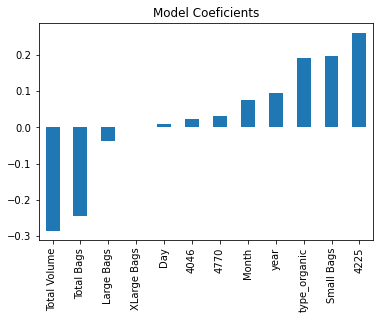

In [61]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 2.Ridge

Mean absolute error: 0.20231516785483544
Mean squared error: 0.06541111129863832
Root Mean squared error: 0.25575596043619064
R2 Score: 0.5680532371824235


<AxesSubplot:title={'center':'Model Coeficients'}>

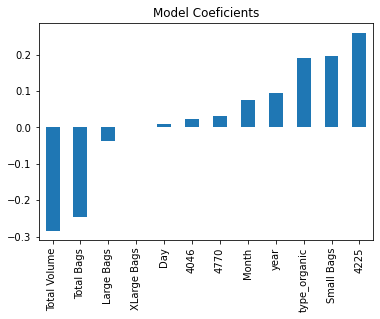

In [62]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 3.RandomForestRegressor

Mean absolute error: 0.10438230740181267
Mean squared error: 0.021390224023791534
Root Mean squared error: 0.14625397096759982
R2 Score: 0.8587481875848844


<AxesSubplot:title={'center':'Feature Importance'}>

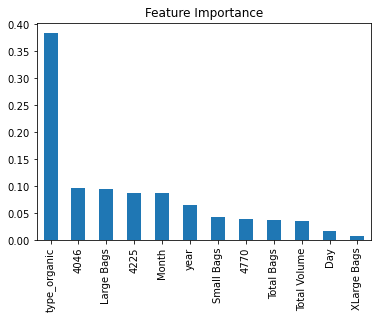

In [63]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 4.GradientBoostingRegressor

Mean absolute error: 0.15766543209949316
Mean squared error: 0.04235926966746112
Root Mean squared error: 0.2058136770660811
R2 Score: 0.7202776555096155


<AxesSubplot:title={'center':'Feature Importance'}>

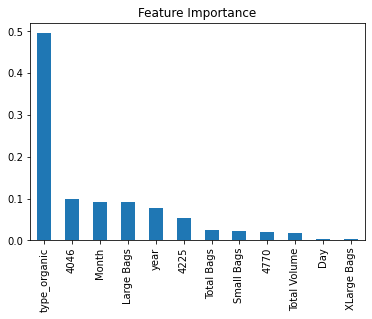

In [64]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 5.ExtraTreesRegressor

Mean absolute error: 0.09013251510574016
Mean squared error: 0.016743472643504523
Root Mean squared error: 0.12939657122004633
R2 Score: 0.8894333292448284


<AxesSubplot:title={'center':'Feature Importance'}>

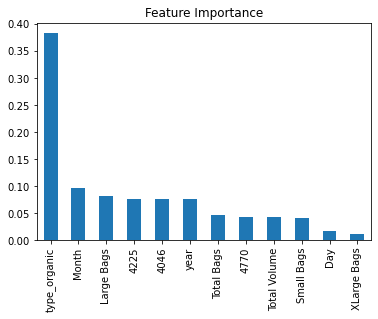

In [65]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 6.XGBRegressor

Mean absolute error: 0.11091131667581208
Mean squared error: 0.02297225195298418
Root Mean squared error: 0.15156599867049397
R2 Score: 0.8483011575752294


<AxesSubplot:title={'center':'Feature Importance'}>

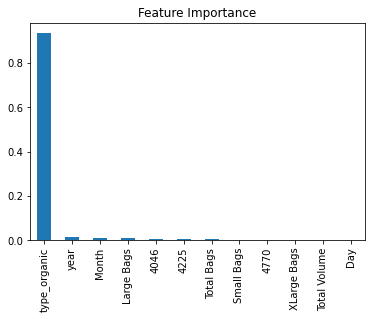

In [66]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

- Here, we observe that ExtraTreesRegressor is giving the highest accuracy score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.22416094900909958


In [69]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.22410458988857865


In [70]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for RandomForestRegressor

0.19232384289820148


In [71]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for GradientBoostingRegressor

0.3444148069296916


In [72]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for ExtraTreesRegressor

0.27082069136824605


In [73]:
print(cross_val_score(XGB,x,y,cv=5).mean()) #cross validation for XGBRegressor

0.3220891744211247


From the above cross validation score, we can conclude that ExtraTreesRegressor is our best model with the least difference.

### Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters={'max_features':['auto','sqrt','log2'],
           'criterion':['mse','mae'],
           'max_depth':[3,4,5,6],
           'n_estimators':[10,20,30,40]}

In [76]:
GCVETR=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)


In [77]:
GCVETR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40]})

In [79]:
GCVETR.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 30}

In [80]:
Final_mod=ExtraTreesRegressor(criterion="mse",max_depth=6,max_features="auto",n_estimators=30)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

63.182045563857244


- After Hyper Parameter tuning, the improved score of the best model SVC is 92.37%

### Saving the Model

In [87]:
import joblib
joblib.dump(Final_mod,"avocado_model.pkl")

['avocado_model.pkl']